In [22]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import matplotlib as mpl

weather = pd.read_csv("../../data/raw/weather.csv", encoding='euc-kr')
weather_location = pd.read_csv("../../data/raw/weather_station_info.csv", encoding='euc-kr')

In [23]:
weather.head(5)

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2)
0,90,속초,2010-01,-0.4,4.0,-4.7,12.6,-11.6,41.5,17.5,2.9,10.7,19.8,194.1,63.54,NaN
1,90,속초,2010-02,1.5,5.4,-2.3,14.2,-8.7,113.5,28.8,2.4,9.0,17.5,134.1,44.45,NaN
2,90,속초,2010-03,3.7,7.1,0.6,13.2,-2.2,152.1,40.5,2.5,10.3,22.4,122.5,33.05,NaN
3,90,속초,2010-04,9.1,13.1,5.3,20.3,0.4,51.6,15.5,2.8,11.9,20.7,186.3,47.05,NaN
4,90,속초,2010-05,16.0,20.8,11.4,30.9,5.0,149.5,93.0,2.7,11.3,21.5,206.6,46.77,NaN


In [24]:
weather['일시'].dtype

dtype('O')

In [25]:
weather[['year', 'month']] = weather['일시'].str.split('-', expand=True)
weather['year'] = weather['year'].astype(int)
weather['month'] = weather['month'].astype(int)

In [26]:
weather.head(5)

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),year,month
0,90,속초,2010-01,-0.4,4.0,-4.7,12.6,-11.6,41.5,17.5,2.9,10.7,19.8,194.1,63.54,NaN,2010,1
1,90,속초,2010-02,1.5,5.4,-2.3,14.2,-8.7,113.5,28.8,2.4,9.0,17.5,134.1,44.45,NaN,2010,2
2,90,속초,2010-03,3.7,7.1,0.6,13.2,-2.2,152.1,40.5,2.5,10.3,22.4,122.5,33.05,NaN,2010,3
3,90,속초,2010-04,9.1,13.1,5.3,20.3,0.4,51.6,15.5,2.8,11.9,20.7,186.3,47.05,NaN,2010,4
4,90,속초,2010-05,16.0,20.8,11.4,30.9,5.0,149.5,93.0,2.7,11.3,21.5,206.6,46.77,NaN,2010,5


In [27]:
def season_month(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'

weather['season'] = weather['month'].apply(season_month)
avg_by_month = weather.groupby(['지점', 'season'])[weather.columns[3:15]].mean().reset_index()

In [28]:
avg_by_month.head(5)

,지점,season,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),합계 일조시간(hr),일조율(%)
0,90,fall,14.696296,18.659259,10.737037,24.670370,4.551852,116.233333,48.014815,2.000000,8.792593,15.888889,186.651852,54.919259
1,90,spring,11.707407,16.288889,7.251852,25.774074,1.281481,68.737037,27.544444,2.455556,10.344444,18.937037,214.455556,53.467778
2,90,summer,23.129630,26.644444,20.185185,33.237037,15.433333,207.940741,68.785185,1.729630,8.551852,14.414815,167.603704,38.613333
3,90,winter,0.959259,4.974074,-3.111111,12.137037,-10.522222,44.822222,19.107407,2.311111,9.470370,17.422222,193.255556,64.255556
4,93,fall,11.187500,18.150000,5.450000,24.812500,-2.912500,55.012500,27.862500,1.012500,6.600000,10.962500,186.150000,54.928750


In [29]:
weather_location.head(5)

,지점,시작일,종료일,지점명,지점주소,관리관서,위도,경도,노장해발고도(m),기압계(관측장비지상높이(m)),기온계(관측장비지상높이(m)),풍속계(관측장비지상높이(m)),강우계(관측장비지상높이(m))
0,90,1968-01-01,NaN,속초,강원특별자치도 고성군토성면 봉포5길9 속초자동기상관측소,속초기상대(90),38.2509,128.5647,17.53,18.73,1.7,10.0,1.4
1,93,2016-10-01,NaN,북춘천,강원특별자치도 춘천시신북읍 산천리264(장본1길 12) 춘천기상대,춘천기상대(101),37.9474,127.7544,95.78,96.78,1.5,10.0,1.4
2,95,1988-01-01,NaN,철원,강원특별자치도 철원군갈말읍 명성로179번길 26 철원자동기상관측소,춘천기상대(101),38.1479,127.3042,155.48,156.98,1.8,13.0,1.5
3,98,1998-02-01,NaN,동두천,경기도 동두천시방죽로 16-47동두천서비스센터,수도권기상청(119),37.9019,127.0607,115.62,116.74,1.7,10.0,1.0
4,99,2013-10-22,NaN,파주,경기도 파주시문산읍 마정로46-29(파주기상대),수도권기상청(119),37.8859,126.7665,30.59,31.99,1.7,10.0,1.0


In [30]:
weather_location = weather_location[['지점', '위도', '경도','노장해발고도(m)']]
weather_location.head(5)

,지점,위도,경도,노장해발고도(m)
0,90,38.2509,128.5647,17.53
1,93,37.9474,127.7544,95.78
2,95,38.1479,127.3042,155.48
3,98,37.9019,127.0607,115.62
4,99,37.8859,126.7665,30.59


In [31]:
weather = weather.merge(weather_location[['지점', '위도', '경도']], on='지점', how='left')
weather.head(5)

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),...,최대풍속(m/s),최대순간풍속(m/s),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),year,month,season,위도,경도
0,90,속초,2010-01,-0.4,4.0,-4.7,12.6,-11.6,41.5,17.5,...,10.7,19.8,194.1,63.54,NaN,2010,1,winter,38.2509,128.5647
1,90,속초,2010-02,1.5,5.4,-2.3,14.2,-8.7,113.5,28.8,...,9.0,17.5,134.1,44.45,NaN,2010,2,winter,38.2509,128.5647
2,90,속초,2010-03,3.7,7.1,0.6,13.2,-2.2,152.1,40.5,...,10.3,22.4,122.5,33.05,NaN,2010,3,spring,38.2509,128.5647
3,90,속초,2010-04,9.1,13.1,5.3,20.3,0.4,51.6,15.5,...,11.9,20.7,186.3,47.05,NaN,2010,4,spring,38.2509,128.5647
4,90,속초,2010-05,16.0,20.8,11.4,30.9,5.0,149.5,93.0,...,11.3,21.5,206.6,46.77,NaN,2010,5,spring,38.2509,128.5647


In [32]:
korea_map = gpd.read_file('../../data/raw/map.shp', encoding='euc-kr')  # CRS는 확인해서 필요시 재설정
if korea_map.crs is None:
    korea_map.set_crs("EPSG:5179", inplace=True)
korea_map = korea_map.to_crs("EPSG:4326")  # 위도경도와 맞추기 위해 WGS84로 변환

In [33]:
print(korea_map.columns)
print(korea_map['CTP_KOR_NM'].unique())

Index(['CTPRVN_CD', 'CTP_ENG_NM', 'CTP_KOR_NM', 'geometry'], dtype='object')
['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도'
 '충청북도' '충청남도' '전라남도' '경상북도' '경상남도' '제주특별자치도' '강원특별자치도' '전북특별자치도']


In [34]:
gdf_points = gpd.GeoDataFrame(
    weather,
    geometry=gpd.points_from_xy(weather['경도'], weather['위도']),
    crs="EPSG:4326"
)

joined = gpd.sjoin(gdf_points, korea_map, how='left', predicate='within')

In [35]:
avg_temp = joined.groupby(['CTP_KOR_NM', 'season'])['평균기온(°C)'].mean().reset_index()
avg_temp.head(5)

,CTP_KOR_NM,season,평균기온(°C)
0,강원특별자치도,fall,12.380145
1,강원특별자치도,spring,10.782716
2,강원특별자치도,summer,22.965185
3,강원특별자치도,winter,-2.230147
4,경기도,fall,13.455026


### 1. Summer

In [36]:
summer_temp = avg_temp[avg_temp['season'] == 'summer']
summer_map = korea_map.merge(summer_temp, on='CTP_KOR_NM')

In [37]:
def plot_temperature_and_bee_data(shp_file, summer_temp, bee_csv_file):
    #한글 폰트
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    fontprop = fm.FontProperties(fname=font_path)
    mpl.rc('font', family=fontprop.get_name())
    mpl.rcParams['axes.unicode_minus'] = False

    korea_map = gpd.read_file(shp_file)
    
    if korea_map.crs is None:
        korea_map.set_crs("EPSG:5179", inplace=True)
    korea_map = korea_map.to_crs("EPSG:4326")

    fig, ax = plt.subplots(figsize=(10, 10))
    summer_map.plot(column='평균기온(°C)', cmap='coolwarm', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
    plt.title('Average Temperature of Summer with SBV')
    
    bee_data = pd.read_csv(bee_csv_file, encoding='euc-kr')
    bee_data = bee_data[['Longitude', 'Latitude', '발생두수', '축종']].dropna()

    unique_species = bee_data['축종'].unique()
    colors = ['#FFDF33', '#108593', '#658E06', '#8625DB', 'purple', 'cyan', 'magenta']
    color_map = {species: colors[i % len(colors)] for i, species in enumerate(unique_species)}
    bee_data['color'] = bee_data['축종'].map(color_map)
    
    min_size = 2
    max_size = 50
    bee_data['size'] = (bee_data['발생두수'] / bee_data['발생두수'].max()) * (max_size - min_size) + min_size

    for species in unique_species:
        df = bee_data[bee_data['축종'] == species]
        ax.scatter(df['Longitude'], df['Latitude'],
                s=df['size'], color=color_map[species],
                label=species, alpha=0.7)
    ax.legend(title='bee type', loc='lower right')
    #plt.axis('off')
    plt.savefig('../../outputs/figures/2_1_1_AvgTemp_Summer_SBV.png', dpi=300, bbox_inches='tight')
    plt.show()

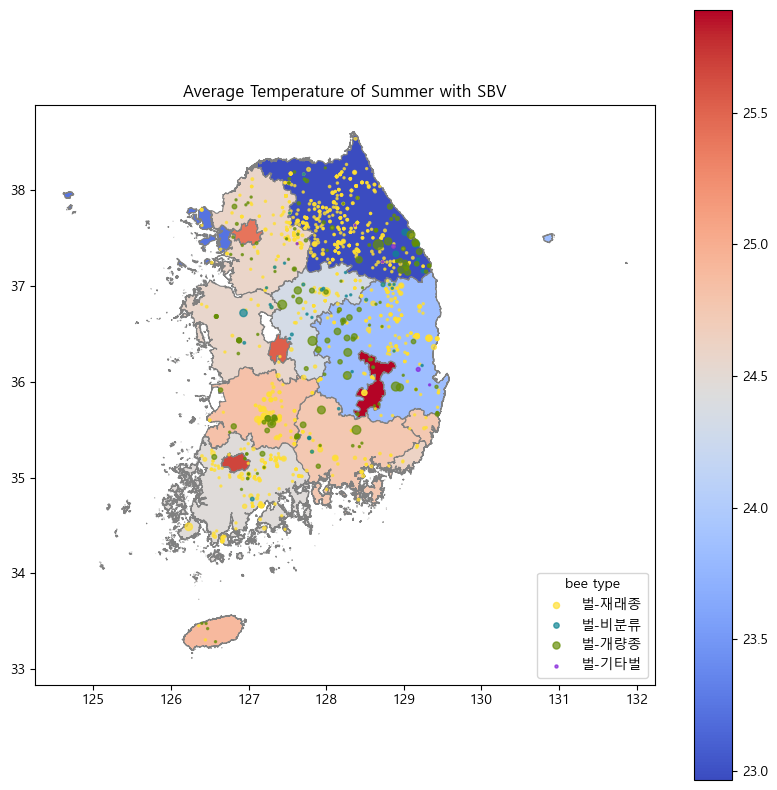

In [38]:
if __name__ == "__main__":
    plot_temperature_and_bee_data('../../data/raw/map.shp', summer_temp, '../../data/raw/SBV_Infection_Location.csv')

### 2. Winter

In [39]:
winter_temp = avg_temp[avg_temp['season'] == 'winter']
winter_map = korea_map.merge(winter_temp, on='CTP_KOR_NM')

In [40]:
def plot_temperature_and_bee_data(shp_file, winter_temp, bee_csv_file):
    #한글 폰트
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    fontprop = fm.FontProperties(fname=font_path)
    mpl.rc('font', family=fontprop.get_name())
    mpl.rcParams['axes.unicode_minus'] = False

    korea_map = gpd.read_file(shp_file)
    
    if korea_map.crs is None:
        korea_map.set_crs("EPSG:5179", inplace=True)
    korea_map = korea_map.to_crs("EPSG:4326")

    fig, ax = plt.subplots(figsize=(10, 10))
    winter_map.plot(column='평균기온(°C)', cmap='coolwarm', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
    plt.title('Average Temperature of Winter with SBV')
    
    bee_data = pd.read_csv(bee_csv_file, encoding='euc-kr')
    bee_data = bee_data[['Longitude', 'Latitude', '발생두수', '축종']].dropna()

    unique_species = bee_data['축종'].unique()
    colors = ['#FFDF33', '#108593', '#658E06', '#8625DB', 'purple', 'cyan', 'magenta']
    color_map = {species: colors[i % len(colors)] for i, species in enumerate(unique_species)}
    bee_data['color'] = bee_data['축종'].map(color_map)
    
    min_size = 2
    max_size = 50
    bee_data['size'] = (bee_data['발생두수'] / bee_data['발생두수'].max()) * (max_size - min_size) + min_size

    for species in unique_species:
        df = bee_data[bee_data['축종'] == species]
        ax.scatter(df['Longitude'], df['Latitude'],
                s=df['size'], color=color_map[species],
                label=species, alpha=0.7)
    ax.legend(title='bee type', loc='lower right')
    #plt.axis('off')
    plt.savefig('../../outputs/figures/2_1_2_AvgTemp_Winter_SBV.png', dpi=300, bbox_inches='tight')
    plt.show()

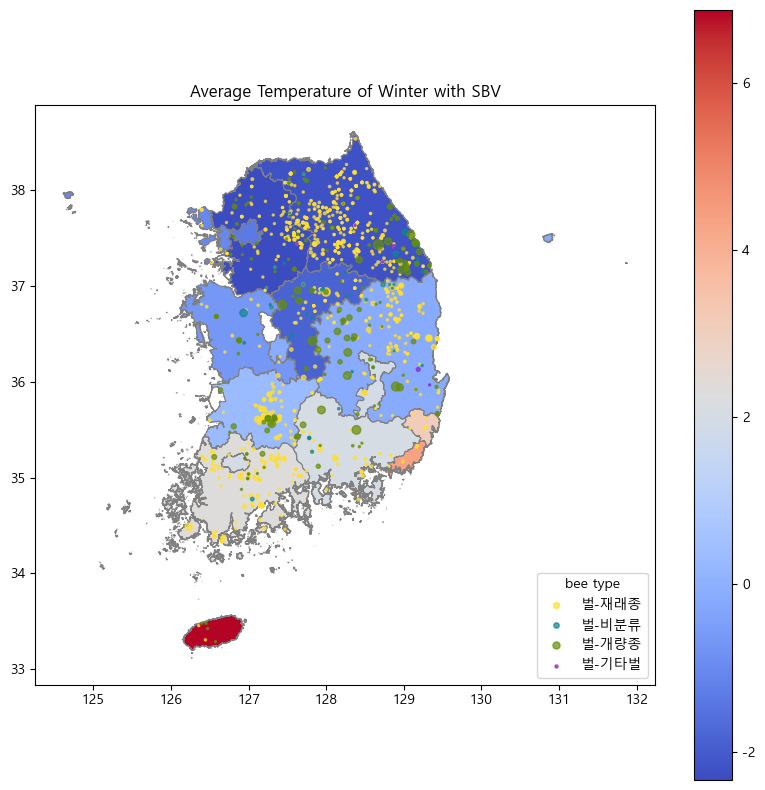

In [41]:
if __name__ == "__main__":
    plot_temperature_and_bee_data('../../data/raw/map.shp', winter_temp, '../../data/raw/SBV_Infection_Location.csv')